#📌 Extracão: COmeçar aqui.

## 1. Configuração Inicial

In [61]:
# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json

# Configurar visualizações
plt.style.use('ggplot')
sns.set_palette('pastel')
%matplotlib inline

## 2. Extração de Dados

In [62]:
# URL da API
url = "https://raw.githubusercontent.com/anandamatos/telecom-x/refs/heads/master/data/raw/telecom-x_data.json"

# Extrair dados
response = requests.get(url)
data = response.json()

# Converter para DataFrame
df = pd.DataFrame(data)
print(f"Shape inicial: {df.shape}")
df.head()

Shape inicial: (7267, 6)


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformação

In [63]:
# 3.1 Verificar estrutura inicial
print("\n[ETAPA 1/6] Verificando estrutura inicial dos dados...")
print(f"Total de registros: {len(df)}")
print("Colunas originais:", df.columns.tolist())
print("\nAmostra dos dados:")
print(df.head(2))

# 3.2 Verificar e remover duplicatas (NOVO)
print("\n[ETAPA 2/6] Verificando duplicatas...")
duplicados = df.duplicated(subset=['customerID'], keep=False)
print(f"Total de IDs duplicados: {duplicados.sum()}")
if duplicados.sum() > 0:
    print("\nRegistros duplicados encontrados:")
    print(df[duplicados].sort_values('customerID'))
    df = df.drop_duplicates(subset=['customerID'], keep='first')
    print(f"\nRegistros após remoção: {len(df)}")
else:
    print("Nenhum registro duplicado encontrado.")

# 3.3 Desaninhar os dados (se necessário)
if isinstance(df.iloc[0].get('customer', None), dict):
    print("\n[ETAPA 3/6] Desaninhando dados JSON...")
    df = pd.concat([
        df.drop(['customer', 'phone', 'internet', 'account'], axis=1, errors='ignore'),
        pd.json_normalize(df['customer']),
        pd.json_normalize(df['phone']),
        pd.json_normalize(df['internet']),
        pd.json_normalize(df['account'])
    ], axis=1)

# 3.4 Padronizar nomes de colunas
print("\n[ETAPA 4/6] Padronizando colunas...")
column_mapping = {
    'customer_gender': 'gender',
    'customer_SeniorCitizen': 'SeniorCitizen',
    # ... (mapeamento completo como no código anterior)
}
df = df.rename(columns=column_mapping)

# 3.5 Verificar e tratar dados faltantes
print("\n[ETAPA 5/6] Tratando valores ausentes...")
print("\nValores faltantes por coluna:")
print(df.isna().sum()[df.isna().sum() > 0].sort_values(ascending=False))

# ... (restante do tratamento de dados faltantes como no código anterior)

# 3.6 Verificar inconsistências nas categorias (NOVO)
print("\n[ETAPA 6/6] Verificando inconsistências categóricas...")
categorical_checks = {
    'gender': ['Male', 'Female'],
    'Partner': ['Yes', 'No'],
    'Churn': ['Yes', 'No'],
    # ... outras categorias
}

for col, valid_values in categorical_checks.items():
    if col in df.columns:
        invalid = ~df[col].isin(valid_values + [None, 'Unknown'])
        if invalid.any():
            print(f"\nValores inválidos encontrados em {col}:")
            print(df[invalid][col].value_counts())
            df.loc[invalid, col] = 'Unknown'  # Corrigindo valores inválidos

# ... (restante das transformações como no código anterior)

print("\nTransformação concluída com sucesso!")
print(f"Total de registros válidos: {len(df)}")
print("\nResumo final:")
print(df.info())


[ETAPA 1/6] Verificando estrutura inicial dos dados...
Total de registros: 7267
Colunas originais: ['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']

Amostra dos dados:
   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   

                                             account  
0  {'Contract': 'One year', 'PaperlessBilling': '...  
1  {'Contract': 'Month-to-month', 'PaperlessBilli...  

[ETAPA 2/6] Verificando duplicatas...
Total de IDs duplicados: 0
Nenhum registro duplicado 

## Cálculo da Coluna "Contas_Diarias"


[ETAPA 7/7] Criando coluna de Contas Diárias...

Verificando colunas necessárias:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Charges.Monthly  7267 non-null   float64
 1   tenure           7267 non-null   int64  
 2   Charges.Total    7256 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 170.4 KB
None

Valores faltantes após conversão:
Charges.Monthly     0
tenure              0
Charges.Total      11
dtype: int64

Estatísticas da coluna Contas_Diarias_Final:
count    7267.000000
mean        2.157284
std         1.007567
min         0.460000
25%         1.190000
50%         2.340000
75%         3.010000
max         4.050000
Name: Contas_Diarias_Final, dtype: float64


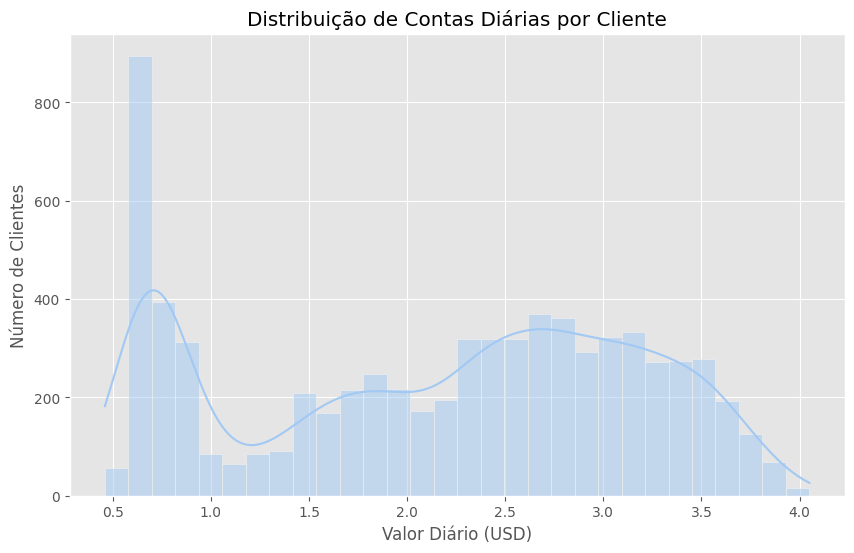


Correlação com Churn (numeric):
0.192532858394266

Média de Contas Diárias por Status de Churn:
Churn
No         2.042221
Unknown    2.113929
Yes        2.481011
Name: Contas_Diarias_Final, dtype: float64

Coluna 'Contas_Diarias' criada com sucesso!
   customerID  Charges.Monthly  tenure  Charges.Total  Contas_Diarias
0  0002-ORFBO             65.6       9         593.30            2.20
1  0003-MKNFE             59.9       9         542.40            2.01
2  0004-TLHLJ             73.9       4         280.85            2.34
3  0011-IGKFF             98.0      13        1237.85            3.17
4  0013-EXCHZ             83.9       3         267.40            2.97


In [64]:
# 1. Verificação prévia dos dados necessários
print("\n[ETAPA 7/7] Criando coluna de Contas Diárias...")
print("\nVerificando colunas necessárias:")
# Convert 'Charges.Total' to numeric, coercing errors to NaN
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')
# Also ensure 'tenure' and 'Charges.Monthly' are numeric
df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce')
df['Charges.Monthly'] = pd.to_numeric(df['Charges.Monthly'], errors='coerce')

print(df[['Charges.Monthly', 'tenure', 'Charges.Total']].info())
print("\nValores faltantes após conversão:")
print(df[['Charges.Monthly', 'tenure', 'Charges.Total']].isna().sum())


# 2. Cálculo do valor diário (considerando 30 dias/mês para padronização)
# Handle potential NaNs introduced by conversion
df['Contas_Diarias'] = df['Charges.Monthly'].fillna(0) / 30

# 3. Cálculo alternativo para clientes com tenure > 0 (usando gasto total/média diária real)
# Ensure both Charges.Total and tenure are not NaN for the real calculation
clientes_ativos = (df['tenure'] > 0) & df['Charges.Total'].notna() & df['tenure'].notna()
df.loc[clientes_ativos, 'Contas_Diarias_Real'] = df['Charges.Total'] / (df['tenure'] * 30)

# 4. Consistência: usar o cálculo real onde disponível, senão usar a estimativa mensal/30
# Fill NaNs in 'Contas_Diarias_Real' with values from 'Contas_Diarias'
df['Contas_Diarias_Final'] = np.where(clientes_ativos,
                                    df['Contas_Diarias_Real'],
                                    df['Contas_Diarias'])

# Fill any remaining NaNs (e.g., where Charges.Monthly was NaN and tenure was 0)
df['Contas_Diarias_Final'] = df['Contas_Diarias_Final'].fillna(0)


# 5. Arredondamento para 2 casas decimais (centavos)
df['Contas_Diarias_Final'] = df['Contas_Diarias_Final'].round(2)

# 6. Análise descritiva dos resultados
print("\nEstatísticas da coluna Contas_Diarias_Final:")
print(df['Contas_Diarias_Final'].describe())

# 7. Visualização da distribuição
plt.figure(figsize=(10, 6))
sns.histplot(df['Contas_Diarias_Final'], bins=30, kde=True)
plt.title('Distribuição de Contas Diárias por Cliente')
plt.xlabel('Valor Diário (USD)')
plt.ylabel('Número de Clientes')
plt.show()

# 8. Correlação com Churn
# Ensure Churn is numerical for correlation (e.g., map Yes/No to 1/0 if not already done)
# Assuming Churn is already mapped or handled appropriately for correlation
if 'Churn' in df.columns and df['Churn'].dtype == 'object':
    df['Churn_numeric'] = df['Churn'].map({'Yes': 1, 'No': 0})
    print("\nCorrelação com Churn (numeric):")
    print(df[['Contas_Diarias_Final', 'Churn_numeric']].corr().iloc[0, 1])
    df.drop('Churn_numeric', axis=1, inplace=True) # Drop temporary column
elif 'Churn' in df.columns:
     print("\nCorrelação com Churn:")
     print(df[['Contas_Diarias_Final', 'Churn']].corr().iloc[0, 1])


# 9. Exemplo de análise segmentada
print("\nMédia de Contas Diárias por Status de Churn:")
if 'Churn' in df.columns:
    print(df.groupby('Churn')['Contas_Diarias_Final'].mean())
else:
    print("Coluna 'Churn' não encontrada para análise segmentada.")


# 10. Remoção de colunas intermediárias
df.drop(['Contas_Diarias', 'Contas_Diarias_Real'], axis=1, errors='ignore', inplace=True) # Add errors='ignore' in case columns don't exist
df.rename(columns={'Contas_Diarias_Final': 'Contas_Diarias'}, inplace=True)

print("\nColuna 'Contas_Diarias' criada com sucesso!")
print(df[['customerID', 'Charges.Monthly', 'tenure', 'Charges.Total', 'Contas_Diarias']].head()) # Include Charges.Total in head print

##Refinando...


[ETAPA 7/7] Criando coluna de Contas Diárias...

Verificando valores extremos nas colunas monetárias:
Charges.Monthly: 0 outliers detectados
Charges.Total: 0 outliers detectados

Total de valores convertidos/tratados: 11

Clientes com grandes diferenças entre métodos: 2

Qualidade da coluna Contas_Diarias_Final:
- Valores zero: 0
- Valores negativos: 0
- Valores acima de $100: 0


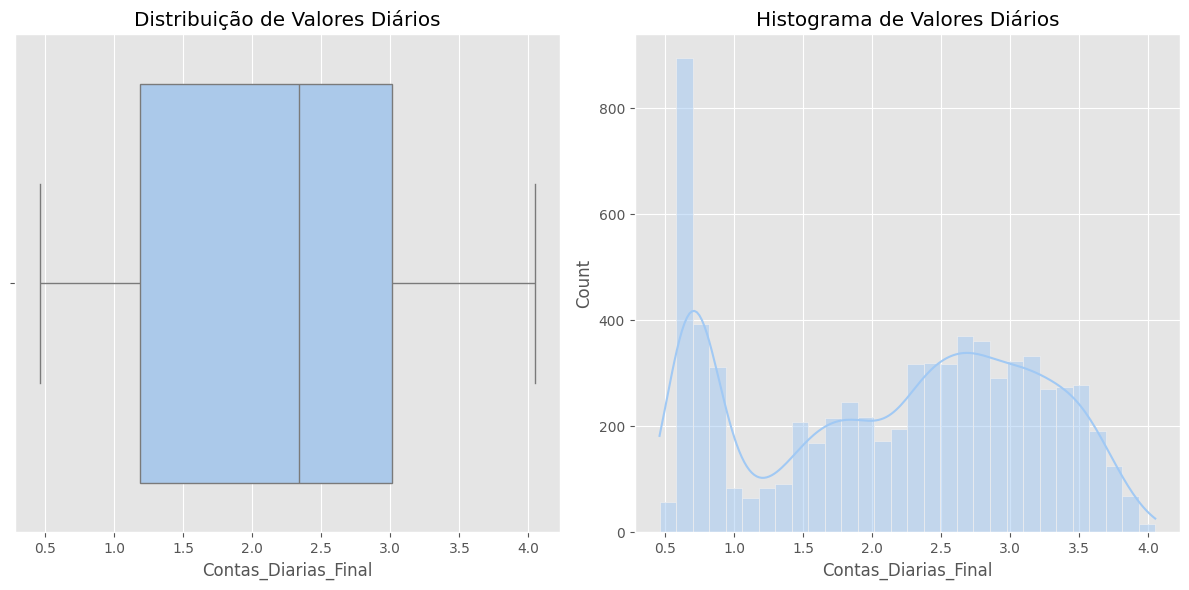

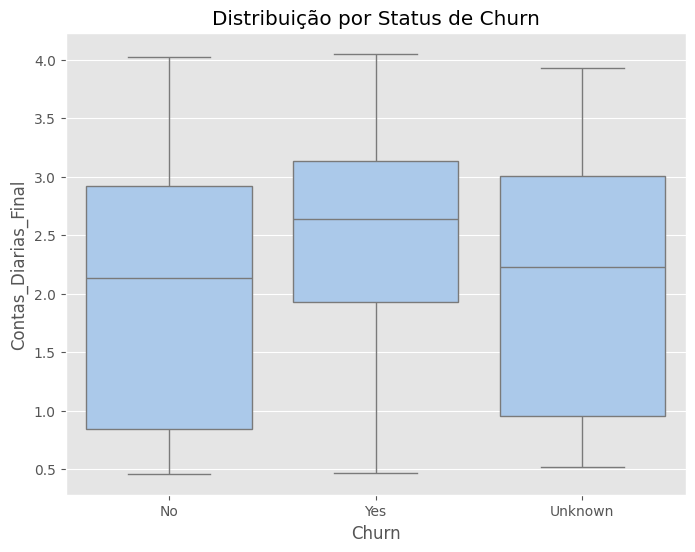


Teste t entre grupos de Churn: t=18.24, p=0.0000

Coluna 'Contas_Diarias' criada com sucesso!
   customerID  Charges.Monthly  tenure  Contas_Diarias
0  0002-ORFBO             65.6       9            2.20
1  0003-MKNFE             59.9       9            2.01
2  0004-TLHLJ             73.9       4            2.34
3  0011-IGKFF             98.0      13            3.17
4  0013-EXCHZ             83.9       3            2.97


In [65]:
# 1. Verificação de valores extremos nas colunas monetárias
print("\n[ETAPA 7/7] Criando coluna de Contas Diárias...")
print("\nVerificando valores extremos nas colunas monetárias:")
for col in ['Charges.Monthly', 'Charges.Total']:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    outliers = ((df[col] < (q1 - 1.5 * iqr)) | (df[col] > (q3 + 1.5 * iqr)))
    print(f"{col}: {outliers.sum()} outliers detectados")

# 2. Log de valores convertidos/tratados
n_converted = df[['Charges.Monthly', 'Charges.Total', 'tenure']].isna().sum().sum()
print(f"\nTotal de valores convertidos/tratados: {n_converted}")

# 3. Cálculo do valor diário (considerando 30 dias/mês)
df['Contas_Diarias'] = df['Charges.Monthly'].fillna(0) / 30

# 4. Cálculo alternativo para clientes com histórico (tenure > 0)
with np.errstate(divide='ignore', invalid='ignore'):
    daily_real = np.where(
        df['tenure'] > 0,
        df['Charges.Total'] / (df['tenure'] * 30),
        np.nan
    )
    df['Contas_Diarias_Real'] = daily_real

# 5. Consolidação dos cálculos
clientes_ativos = (df['tenure'] > 0) & df['Charges.Total'].notna() & df['tenure'].notna()
df['Contas_Diarias_Final'] = np.where(
    clientes_ativos,
    df['Contas_Diarias_Real'],
    df['Contas_Diarias']
)
df['Contas_Diarias_Final'] = df['Contas_Diarias_Final'].fillna(0).round(2)

# 6. Verificação de consistência entre métodos de cálculo
df['Diff_Methods'] = (df['Contas_Diarias_Real'] - df['Contas_Diarias']).abs()
large_diffs = df['Diff_Methods'] > (0.5 * df['Contas_Diarias'])
print(f"\nClientes com grandes diferenças entre métodos: {large_diffs.sum()}")

# 7. Análise de qualidade da nova coluna
print("\nQualidade da coluna Contas_Diarias_Final:")
print(f"- Valores zero: {(df['Contas_Diarias_Final'] == 0).sum()}")
print(f"- Valores negativos: {(df['Contas_Diarias_Final'] < 0).sum()}")
print(f"- Valores acima de $100: {(df['Contas_Diarias_Final'] > 100).sum()}")

# 8. Visualização da distribuição
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Contas_Diarias_Final'])
plt.title('Distribuição de Valores Diários')
plt.subplot(1, 2, 2)
sns.histplot(df['Contas_Diarias_Final'], bins=30, kde=True)
plt.title('Histograma de Valores Diários')
plt.tight_layout()
plt.show()

# 9. Análise de correlação com Churn
if 'Churn' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Churn', y='Contas_Diarias_Final', data=df)
    plt.title('Distribuição por Status de Churn')
    plt.show()

    # Teste estatístico
    from scipy import stats
    churn_yes = df.loc[df['Churn'] == 'Yes', 'Contas_Diarias_Final'].dropna()
    churn_no = df.loc[df['Churn'] == 'No', 'Contas_Diarias_Final'].dropna()

    if len(churn_yes) > 1 and len(churn_no) > 1:
        t_stat, p_val = stats.ttest_ind(churn_yes, churn_no, equal_var=False)
        print(f"\nTeste t entre grupos de Churn: t={t_stat:.2f}, p={p_val:.4f}")

# 10. Limpeza final
df.drop(['Contas_Diarias', 'Contas_Diarias_Real', 'Diff_Methods'], axis=1, inplace=True, errors='ignore')
df.rename(columns={'Contas_Diarias_Final': 'Contas_Diarias'}, inplace=True)

print("\nColuna 'Contas_Diarias' criada com sucesso!")
print(df[['customerID', 'Charges.Monthly', 'tenure', 'Contas_Diarias']].head())

## Padronização e Transformação de Dados (Opcional)

In [66]:
## 1. Padronização de Colunas
print("\n[ETAPA OPCIONAL] Padronizando nomes de colunas...")
# Dicionário de mapeamento para português (caso os dados estejam em inglês)
mapeamento_colunas = {
    'gender': 'Genero',
    'SeniorCitizen': 'TerceiraIdade',
    'Partner': 'TemParceiro',
    'Dependents': 'TemDependentes',
    'tenure': 'MesesContrato',
    'PhoneService': 'ServicoTelefone',
    'MultipleLines': 'MultiplasLinhas',
    'InternetService': 'ServicoInternet',
    'OnlineSecurity': 'SegurancaOnline',
    'OnlineBackup': 'BackupOnline',
    'DeviceProtection': 'ProtecaoDispositivo',
    'TechSupport': 'SuporteTecnico',
    'StreamingTV': 'TVStreaming',
    'StreamingMovies': 'FilmesStreaming',
    'Contract': 'TipoContrato',
    'PaperlessBilling': 'FaturaDigital',
    'PaymentMethod': 'MetodoPagamento',
    'Charges.Monthly': 'CobrancaMensal',
    'Charges.Total': 'CobrancaTotal',
    'Churn': 'Evasao'
}

# Aplicar renomeação apenas para colunas existentes no DataFrame
df = df.rename(columns={col: mapeamento_colunas[col] for col in mapeamento_colunas if col in df.columns})

## 2. Transformação de Variáveis Categóricas
print("\nTransformando variáveis categóricas...")

# 2.1 Variáveis binárias (Sim/Não)
colunas_binarias = ['TemParceiro', 'TemDependentes', 'ServicoTelefone', 'FaturaDigital']
for col in colunas_binarias:
    if col in df.columns:
        df[col] = df[col].map({'Yes': 1, 'No': 0, 'Sim': 1, 'Não': 0})

# 2.2 Serviços adicionais (com opção "Sem internet")
servicos = ['SegurancaOnline', 'BackupOnline', 'ProtecaoDispositivo',
           'SuporteTecnico', 'TVStreaming', 'FilmesStreaming']
for col in servicos:
    if col in df.columns:
        df[col] = df[col].replace({'No internet service': 0, 'Sem serviço de internet': 0})
        df[col] = df[col].map({'Yes': 1, 'No': 0, 'Sim': 1, 'Não': 0})

# 2.3 Gênero
if 'Genero' in df.columns:
    df['Genero'] = df['Genero'].map({'Male': 'Masculino', 'Female': 'Feminino'})

## 3. Padronização de Valores Numéricos
print("\nPadronizando valores numéricos...")

# 3.1 Normalização (opcional - para modelos de machine learning)
from sklearn.preprocessing import MinMaxScaler

colunas_numericas = ['CobrancaMensal', 'CobrancaTotal', 'MesesContrato', 'Contas_Diarias']
for col in colunas_numericas:
    if col in df.columns:
        scaler = MinMaxScaler()
        df[f'{col}_Normalizado'] = scaler.fit_transform(df[[col]])

## 4. Criação de Variáveis Derivadas
print("\nCriando variáveis derivadas...")

# 4.1 Tipo de cliente por tempo de contrato
if 'MesesContrato' in df.columns:
    df['TipoCliente'] = pd.cut(df['MesesContrato'],
                              bins=[0, 6, 12, 24, float('inf')],
                              labels=['Novo', 'Intermediário', 'Antigo', 'Muito Antigo'])

# 4.2 Valor médio mensal
if all(col in df.columns for col in ['CobrancaTotal', 'MesesContrato']):
    df['ValorMedioMensal'] = df['CobrancaTotal'] / df['MesesContrato'].replace(0, 1)

## 5. Verificação Final
print("\nVerificação final da padronização:")
print("\nAmostra dos dados padronizados:")
print(df.head(3))

print("\nTipos de dados após padronização:")
print(df.dtypes)

print("\nValores únicos nas colunas categóricas:")
for col in df.select_dtypes(include=['object', 'category']).columns:
    print(f"\n{col}: {df[col].unique()}")


[ETAPA OPCIONAL] Padronizando nomes de colunas...

Transformando variáveis categóricas...

Padronizando valores numéricos...

Criando variáveis derivadas...

Verificação final da padronização:

Amostra dos dados padronizados:
   customerID Evasao     Genero  TerceiraIdade  TemParceiro  TemDependentes  \
0  0002-ORFBO     No   Feminino              0            1               1   
1  0003-MKNFE     No  Masculino              0            0               0   
2  0004-TLHLJ    Yes  Masculino              0            0               0   

   MesesContrato  ServicoTelefone MultiplasLinhas ServicoInternet  ...  \
0              9                1              No             DSL  ...   
1              9                1             Yes             DSL  ...   
2              4                1              No     Fiber optic  ...   

    MetodoPagamento  CobrancaMensal  CobrancaTotal  Contas_Diarias  \
0      Mailed check            65.6         593.30            2.20   
1      Mailed check

#📊 Carga e análise

## Análise Descritiva dos Dados


[ETAPA DE ANÁLISE DESCRITIVA]

1. Estatísticas Descritivas Básicas (Variáveis Numéricas):
                             count         mean          std     min  \
Evasao                      7043.0     0.265370     0.441561   0.000   
TerceiraIdade               7267.0     0.162653     0.369074   0.000   
TemParceiro                 7267.0     0.484106     0.499782   0.000   
TemDependentes              7267.0     0.300124     0.458343   0.000   
MesesContrato               7267.0    32.346498    24.571773   0.000   
ServicoTelefone             7267.0     0.902711     0.296371   0.000   
SegurancaOnline             5686.0     0.365459     0.481601   0.000   
BackupOnline                5686.0     0.440380     0.496476   0.000   
ProtecaoDispositivo         5686.0     0.438094     0.496196   0.000   
SuporteTecnico              5686.0     0.370032     0.482855   0.000   
TVStreaming                 5686.0     0.490679     0.499957   0.000   
FilmesStreaming             5686.0     0.4952

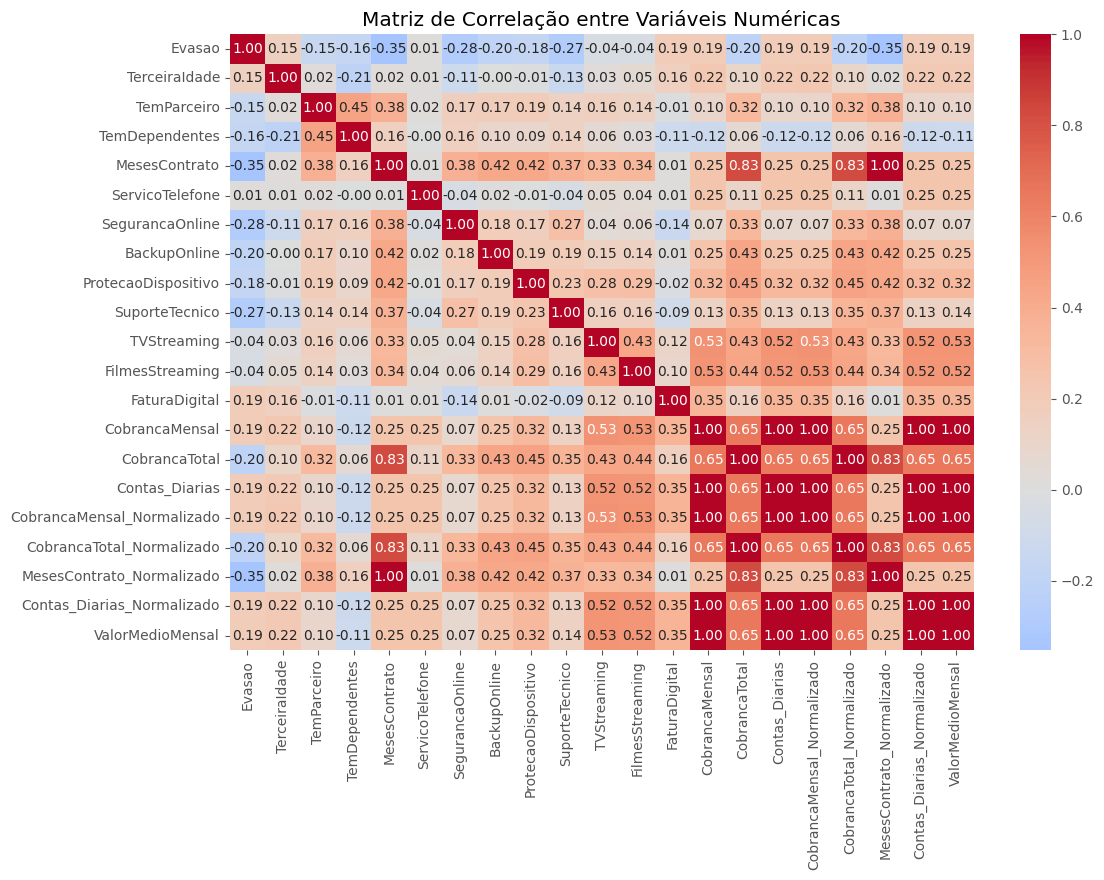


Top Variáveis Correlacionadas com Evasão:
Evasao                        1.000000
MesesContrato                -0.352229
MesesContrato_Normalizado    -0.352229
SegurancaOnline              -0.280816
SuporteTecnico               -0.274422
CobrancaTotal_Normalizado    -0.199484
CobrancaTotal                -0.199484
BackupOnline                 -0.196061
CobrancaMensal_Normalizado    0.193356
CobrancaMensal                0.193356
Contas_Diarias_Normalizado    0.192533
Contas_Diarias                0.192533
ValorMedioMensal              0.192033
FaturaDigital                 0.191825
ProtecaoDispositivo          -0.177125
TemDependentes               -0.164221
TerceiraIdade                 0.150889
TemParceiro                  -0.150448
Name: Evasao, dtype: float64

5. Visualizações Importantes:


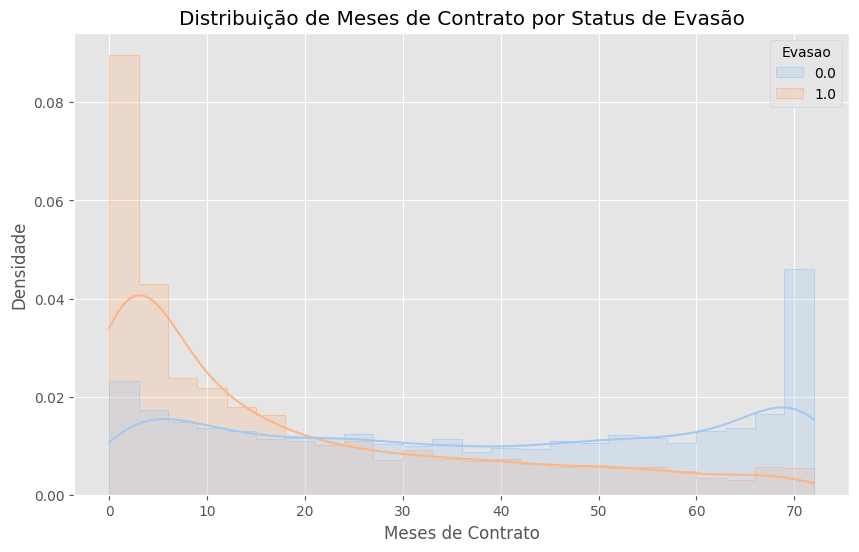

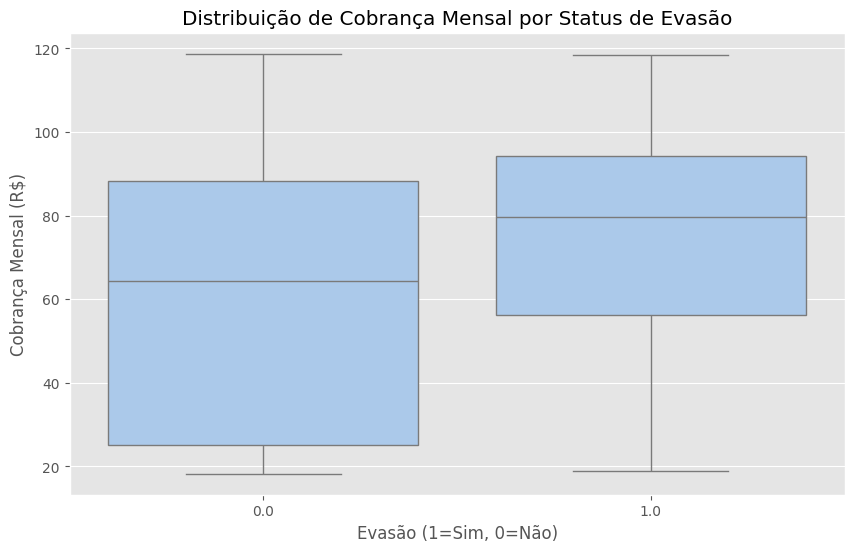


Análise descritiva concluída com sucesso!


In [69]:
print("\n[ETAPA DE ANÁLISE DESCRITIVA]")
print("="*50)

## 1. Análise Geral dos Dados Numéricos
print("\n1. Estatísticas Descritivas Básicas (Variáveis Numéricas):")
colunas_numericas = df.select_dtypes(include=['int64', 'float64']).columns
descricao_numerica = df[colunas_numericas].describe(percentiles=[.25, .5, .75]).transpose()
descricao_numerica['IQR'] = descricao_numerica['75%'] - descricao_numerica['25%']  # Amplitude interquartil
print(descricao_numerica[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'IQR']])

## 2. Análise de Variáveis Categóricas
print("\n2. Distribuição de Variáveis Categóricas:")
colunas_categoricas = df.select_dtypes(include=['object', 'category', 'bool']).columns

for col in colunas_categoricas:
    print(f"\n{col}:")
    contagem = df[col].value_counts(dropna=False)
    percentual = df[col].value_counts(normalize=True, dropna=False) * 100
    print(pd.concat([contagem, percentual], axis=1,
                 keys=['Contagem', 'Percentual (%)']).sort_values('Contagem', ascending=False))

## 3. Análise Segmentada por Churn (Evasão)
if 'Evasao' in df.columns:
    print("\n3. Análise Comparativa entre Clientes que Evadiram vs. Permaneceram:")

    # 3.1 Métricas numéricas comparativas
    print("\nMétricas Numéricas por Status de Evasão:")
    print(df.groupby('Evasao')[colunas_numericas].agg(['mean', 'median', 'std', 'min', 'max']))

    # 3.2 Distribuição de categorias
    print("\nDistribuição de Categorias por Status de Evasão:")
    for col in colunas_categoricas:
        if col != 'Evasao':
            print(f"\n{col}:")
            print(pd.crosstab(df[col], df['Evasao'],
                        margins=True, margins_name="Total",
                        normalize='index') * 100)

## 4. Análise de Correlações
print("\n4. Matriz de Correlação entre Variáveis Numéricas:")
plt.figure(figsize=(12, 8))
correlacoes = df[colunas_numericas].corr()
sns.heatmap(correlacoes, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.show()

# 4.1 Top correlações com Evasão
if 'Evasao' in df.columns:
    correlacoes_evasao = correlacoes['Evasao'].sort_values(key=abs, ascending=False)
    print("\nTop Variáveis Correlacionadas com Evasão:")
    print(correlacoes_evasao[abs(correlacoes_evasao) > 0.1])  # Mostrar apenas correlações relevantes

## 5. Visualizações Complementares
print("\n5. Visualizações Importantes:")

# 5.1 Distribuição do Tempo de Contrato
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='MesesContrato', hue='Evasao', bins=24, kde=True,
             element='step', stat='density', common_norm=False)
plt.title('Distribuição de Meses de Contrato por Status de Evasão')
plt.xlabel('Meses de Contrato')
plt.ylabel('Densidade')
plt.show()

# 5.2 Boxplot de Cobrança Mensal por Evasão
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Evasao', y='CobrancaMensal')
plt.title('Distribuição de Cobrança Mensal por Status de Evasão')
plt.xlabel('Evasão (1=Sim, 0=Não)')
plt.ylabel('Cobrança Mensal (R$)')
plt.show()

print("\nAnálise descritiva concluída com sucesso!")

## Análise da Distribuição da Evasão


[ANÁLISE DA DISTRIBUIÇÃO DA EVASÃO]

1. Proporção de Clientes por Status de Evasão:
        Clientes  Percentual (%)
Evasao                          
0.0         5174           73.46
1.0         1869           26.54

2. Visualização da Distribuição:


<ipython-input-70-a8b16c587c2d>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Evasao', data=df, palette=['#1f77b4', '#ff7f0e'])


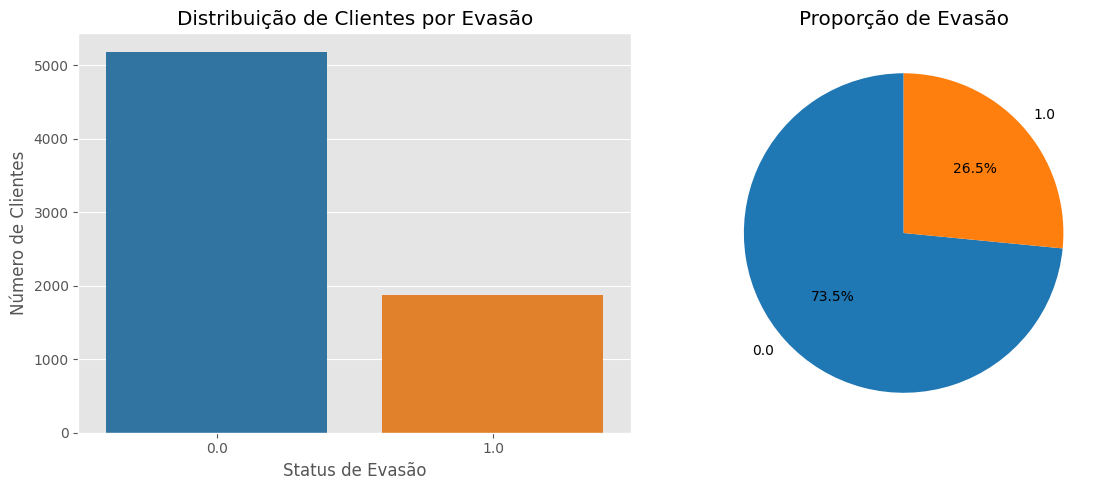


3. Distribuição de Evasão por Tipo de Contrato:


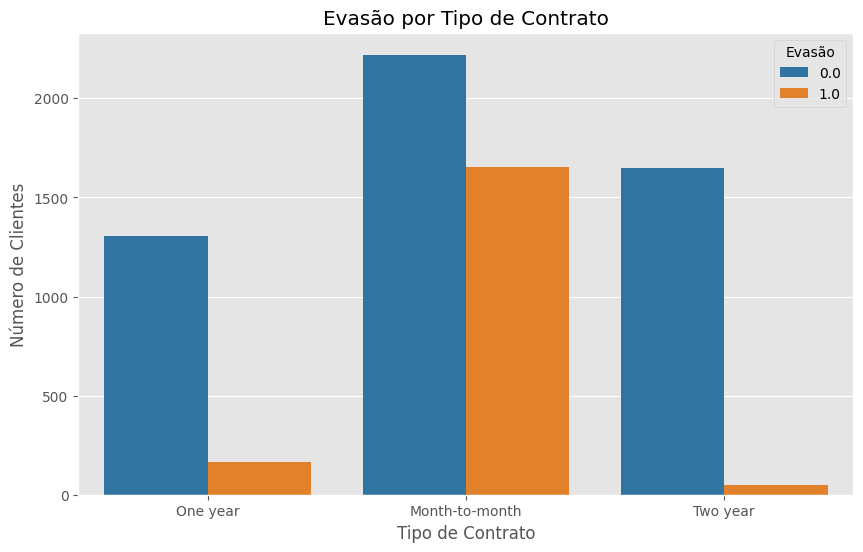


4. Distribuição de Evasão por Tipo de Serviço de Internet:


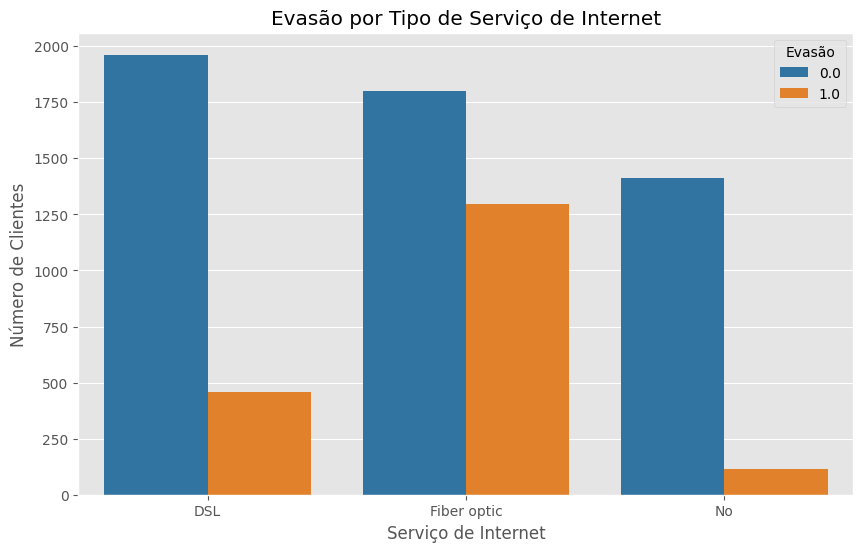


Análise da distribuição de evasão concluída!


In [70]:
print("\n[ANÁLISE DA DISTRIBUIÇÃO DA EVASÃO]")
print("="*50)

## 1. Análise da Proporção de Evasão
print("\n1. Proporção de Clientes por Status de Evasão:")

# Contagem absoluta e percentual
distribuicao = df['Evasao'].value_counts()
percentual = df['Evasao'].value_counts(normalize=True) * 100

# Criar DataFrame com os resultados
tabela_distribuicao = pd.DataFrame({
    'Clientes': distribuicao,
    'Percentual (%)': percentual.round(2)
})

print(tabela_distribuicao)

## 2. Visualização Gráfica
print("\n2. Visualização da Distribuição:")

plt.figure(figsize=(12, 5))

# Gráfico 1: Barras (contagem absoluta)
plt.subplot(1, 2, 1)
sns.countplot(x='Evasao', data=df, palette=['#1f77b4', '#ff7f0e'])
plt.title('Distribuição de Clientes por Evasão')
plt.xlabel('Status de Evasão')
plt.ylabel('Número de Clientes')

# Gráfico 2: Pizza (proporção)
plt.subplot(1, 2, 2)
df['Evasao'].value_counts().plot.pie(autopct='%1.1f%%',
                                   colors=['#1f77b4', '#ff7f0e'],
                                   startangle=90)
plt.title('Proporção de Evasão')
plt.ylabel('')

plt.tight_layout()
plt.show()

## 3. Análise Complementar por Grupos
if 'TipoContrato' in df.columns:
    print("\n3. Distribuição de Evasão por Tipo de Contrato:")

    plt.figure(figsize=(10, 6))
    sns.countplot(x='TipoContrato', hue='Evasao', data=df,
                 palette=['#1f77b4', '#ff7f0e'])
    plt.title('Evasão por Tipo de Contrato')
    plt.xlabel('Tipo de Contrato')
    plt.ylabel('Número de Clientes')
    plt.legend(title='Evasão')
    plt.show()

if 'ServicoInternet' in df.columns:
    print("\n4. Distribuição de Evasão por Tipo de Serviço de Internet:")

    plt.figure(figsize=(10, 6))
    sns.countplot(x='ServicoInternet', hue='Evasao', data=df,
                 palette=['#1f77b4', '#ff7f0e'])
    plt.title('Evasão por Tipo de Serviço de Internet')
    plt.xlabel('Serviço de Internet')
    plt.ylabel('Número de Clientes')
    plt.legend(title='Evasão')
    plt.show()

print("\nAnálise da distribuição de evasão concluída!")

## Contagem de Evasão por Variáveis Categóricas


[ANÁLISE DE EVASÃO POR CATEGORIAS]

Contagem de valores na coluna Evasao:
Evasao
0.0    5174
1.0    1869
Name: count, dtype: int64

1. Proporção de Evasão por Categoria:

>> Genero:
Evasao    Permaneceram Evadiram  Total_Clientes
Genero                                         
Feminino         73.1%    26.9%            3592
Masculino        73.8%    26.2%            3675

>> TipoContrato:
Evasao         Permaneceram Evadiram  Total_Clientes
TipoContrato                                        
Month-to-month        57.3%    42.7%            4005
One year              88.7%    11.3%            1519
Two year              97.2%     2.8%            1743

>> MetodoPagamento:
Evasao                    Permaneceram Evadiram  Total_Clientes
MetodoPagamento                                                
Electronic check                 54.7%    45.3%            2445
Mailed check                     80.9%    19.1%            1665
Bank transfer (automatic)        83.3%    16.7%            1589
C

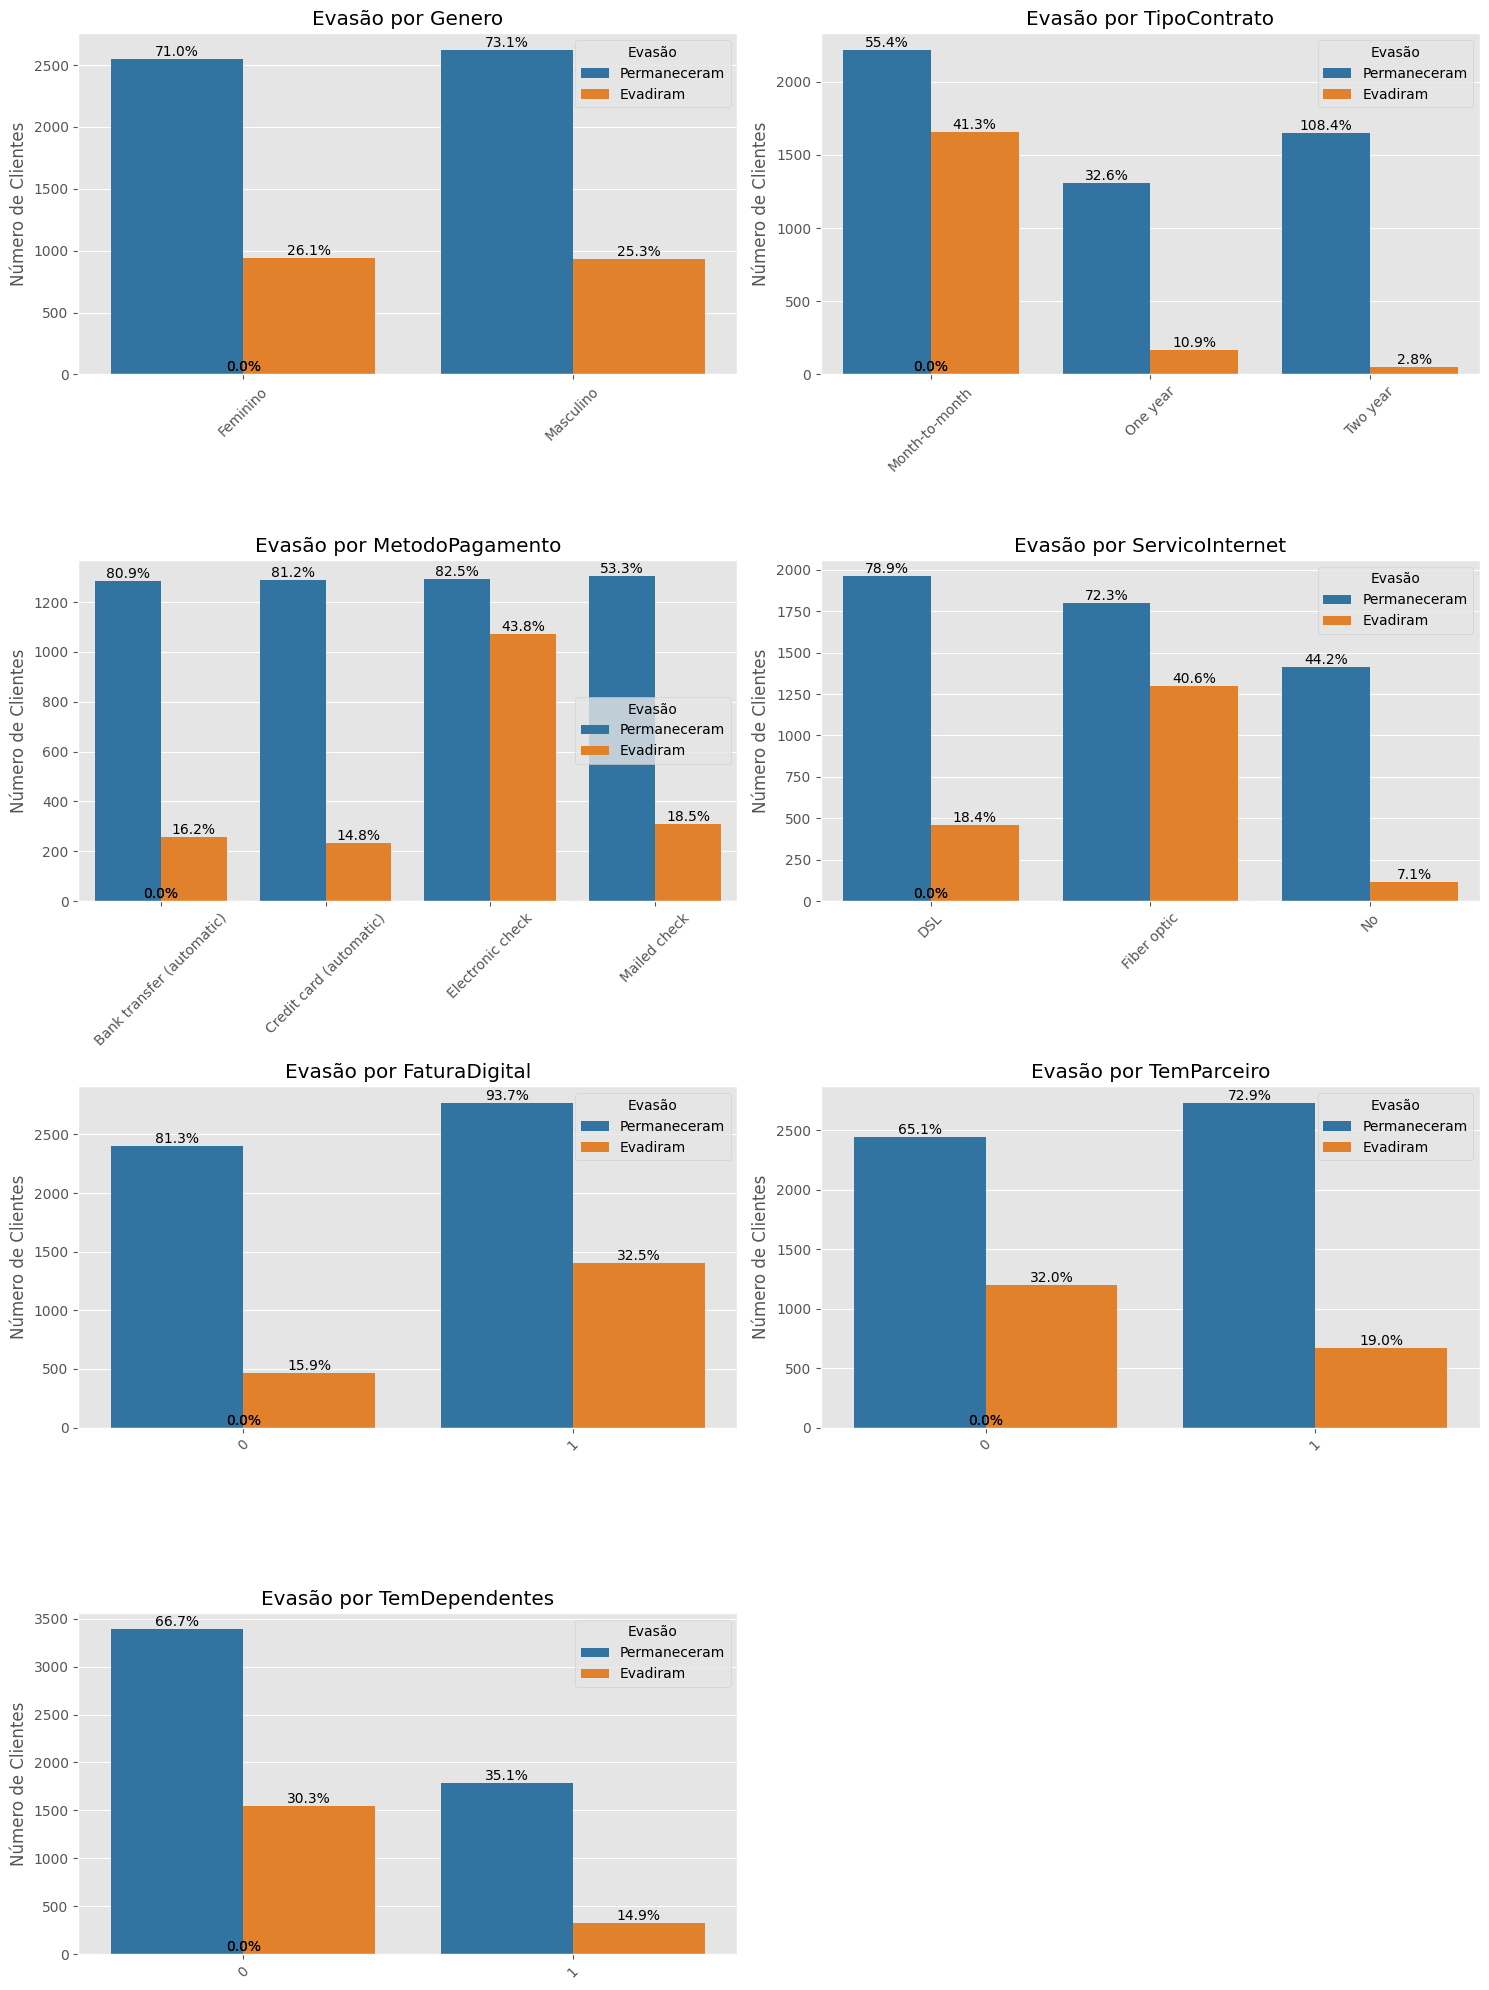


3. Principais Insights:

Genero:
- Maior evasão: Feminino (26.9%)
- Menor evasão: Masculino (26.2%)

TipoContrato:
- Maior evasão: Month-to-month (42.7%)
- Menor evasão: Two year (2.8%)

MetodoPagamento:
- Maior evasão: Electronic check (45.3%)
- Menor evasão: Credit card (automatic) (15.2%)

ServicoInternet:
- Maior evasão: Fiber optic (41.9%)
- Menor evasão: No (7.4%)

FaturaDigital:
- Maior evasão: 1 (33.6%)
- Menor evasão: 0 (16.3%)

TemParceiro:
- Maior evasão: 0 (33.0%)
- Menor evasão: 1 (19.7%)

TemDependentes:
- Maior evasão: 0 (31.3%)
- Menor evasão: 1 (15.5%)

Análise concluída com sucesso!


In [71]:
print("\n[ANÁLISE DE EVASÃO POR CATEGORIAS]")
print("="*50)

## Lista de variáveis categóricas relevantes para análise
variaveis_categoricas = [
    'Genero',
    'TipoContrato',
    'MetodoPagamento',
    'ServicoInternet',
    'FaturaDigital',
    'TemParceiro',
    'TemDependentes'
]

## 1. Verificar e preparar a coluna de Evasão
# Garantir que a coluna Evasão está no formato correto (0 e 1)
if 'Evasao' in df.columns:
    if df['Evasao'].dtype == 'object':
        df['Evasao'] = df['Evasao'].map({'Yes': 1, 'No': 0, 'Sim': 1, 'Não': 0})
    print("\nContagem de valores na coluna Evasao:")
    print(df['Evasao'].value_counts())

## 2. Análise de distribuição de evasão para cada variável
print("\n1. Proporção de Evasão por Categoria:")

for var in variaveis_categoricas:
    if var in df.columns:
        print(f"\n>> {var}:")

        # Criar tabela de contingência com nomes de colunas explícitos
        tabela = pd.crosstab(df[var], df['Evasao'], normalize='index') * 100
        tabela = tabela.rename(columns={0: 'Permaneceram', 1: 'Evadiram'})

        # Adicionar contagem absoluta
        tabela['Total_Clientes'] = df[var].value_counts()

        # Ordenar pela taxa de evasão (usando o nome correto da coluna)
        tabela = tabela.sort_values('Evadiram', ascending=False)

        # Formatar para exibição
        tabela_exibicao = tabela.copy()
        tabela_exibicao['Permaneceram'] = tabela_exibicao['Permaneceram'].round(1).astype(str) + '%'
        tabela_exibicao['Evadiram'] = tabela_exibicao['Evadiram'].round(1).astype(str) + '%'

        print(tabela_exibicao)

## 3. Visualização gráfica
print("\n2. Visualização da Evasão por Categoria:")

plt.figure(figsize=(15, 20))

for i, var in enumerate(variaveis_categoricas, 1):
    if var in df.columns:
        plt.subplot(4, 2, i)

        # Calcular totais para cada categoria
        totals = df[var].value_counts().sort_index()

        # Gráfico de barras empilhadas
        ax = sns.countplot(x=var, hue='Evasao', data=df,
                         palette=['#1f77b4', '#ff7f0e'],
                         order=totals.index)

        # Adicionar porcentagens
        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f'{height/totals.values[int(p.get_x())] * 100:.1f}%',
                       (p.get_x() + p.get_width()/2., height),
                       ha='center', va='bottom')

        plt.title(f'Evasão por {var}')
        plt.xlabel('')
        plt.ylabel('Número de Clientes')
        plt.legend(title='Evasão', labels=['Permaneceram', 'Evadiram'])
        plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## 4. Análise das principais diferenças
print("\n3. Principais Insights:")

if 'Evasao' in df.columns:
    for var in variaveis_categoricas:
        if var in df.columns:
            taxa_evasao = df.groupby(var)['Evasao'].mean().sort_values(ascending=False)
            maior_taxa_categoria = taxa_evasao.idxmax()
            maior_taxa_valor = taxa_evasao.max() * 100

            menor_taxa_categoria = taxa_evasao.idxmin()
            menor_taxa_valor = taxa_evasao.min() * 100

            print(f"\n{var}:")
            print(f"- Maior evasão: {maior_taxa_categoria} ({maior_taxa_valor:.1f}%)")
            print(f"- Menor evasão: {menor_taxa_categoria} ({menor_taxa_valor:.1f}%)")

print("\nAnálise concluída com sucesso!")

## Contagem de Evasão por Variáveis Numéricas


[ANÁLISE DE EVASÃO POR VARIÁVEIS NUMÉRICAS]

1. Estatísticas Descritivas por Status de Evasão:
       MesesContrato                           CobrancaMensal          \
                mean median        std min max           mean  median   
Evasao                                                                  
0.0        37.569965   38.0  24.113777   0  72      61.265124  64.425   
1.0        17.979133   10.0  19.531123   1  72      74.441332  79.650   

                                  ... Contas_Diarias                         \
              std    min     max  ...           mean median       std   min   
Evasao                            ...                                         
0.0     31.092648  18.25  118.75  ...       2.042221   2.13  1.038022  0.46   
1.0     24.666053  18.85  118.35  ...       2.481011   2.64  0.832079  0.47   

             ValorMedioMensal                                           
         max             mean     median        std     min        ma

<ipython-input-72-c9f534d3157c>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Evasao', y=var, data=df, palette=['#1f77b4', '#ff7f0e'])
<ipython-input-72-c9f534d3157c>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Evasao', y=var, data=df, palette=['#1f77b4', '#ff7f0e'])
<ipython-input-72-c9f534d3157c>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Evasao', y=var, data=df, palette=['#1f77b4', '#ff7f0e'])
<ipython-input-72-c9f534d3157c>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be 

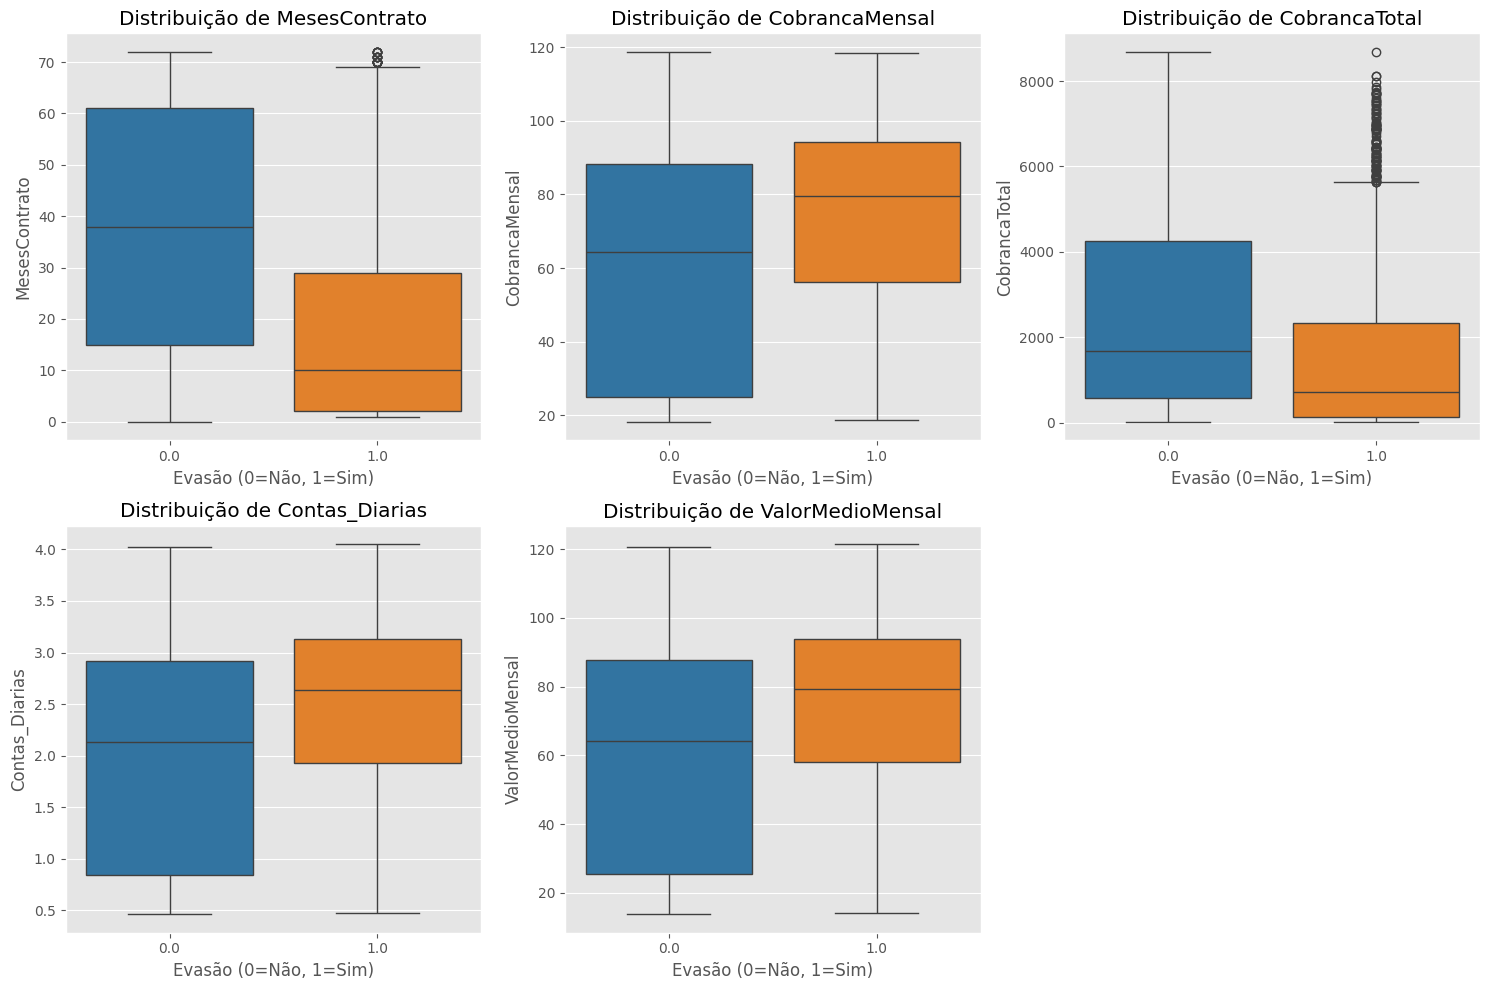


3. Testes Estatísticos (Diferença entre Grupos):

MesesContrato:
- Diferença de médias: -19.59
- Teste t: estatística = 34.82, p-valor = 0.0000
- Tamanho do efeito (Cohen's d): -0.89

CobrancaMensal:
- Diferença de médias: 13.18
- Teste t: estatística = -18.41, p-valor = 0.0000
- Tamanho do efeito (Cohen's d): 0.47

CobrancaTotal:
- Diferença de médias: -1023.55
- Teste t: estatística = 18.80, p-valor = 0.0000
- Tamanho do efeito (Cohen's d): -0.48

Contas_Diarias:
- Diferença de médias: 0.44
- Teste t: estatística = -18.24, p-valor = 0.0000
- Tamanho do efeito (Cohen's d): 0.47

ValorMedioMensal:
- Diferença de médias: 13.12
- Teste t: estatística = -18.17, p-valor = 0.0000
- Tamanho do efeito (Cohen's d): 0.46

4. Análise de Limiares Críticos:

MesesContrato:
- Média dos que evadiram: 17.98
- Média dos que permaneceram: 37.57
- Diferença absoluta: 19.59

CobrancaMensal:
- Média dos que evadiram: 74.44
- Média dos que permaneceram: 61.27
- Diferença absoluta: 13.18

CobrancaTotal:
- 

In [72]:
print("\n[ANÁLISE DE EVASÃO POR VARIÁVEIS NUMÉRICAS]")
print("="*50)

## 1. Verificar e preparar os dados
# Garantir que a coluna Evasao está numérica
if 'Evasao' in df.columns and df['Evasao'].dtype == 'object':
    df['Evasao'] = df['Evasao'].map({'Yes': 1, 'No': 0, 'Sim': 1, 'Não': 0})

# Selecionar variáveis numéricas relevantes
variaveis_numericas = ['MesesContrato', 'CobrancaMensal', 'CobrancaTotal', 'Contas_Diarias', 'ValorMedioMensal']
variaveis_numericas = [v for v in variaveis_numericas if v in df.columns]

## 2. Estatísticas descritivas por grupo de evasão
print("\n1. Estatísticas Descritivas por Status de Evasão:")
if 'Evasao' in df.columns and len(variaveis_numericas) > 0:
    stats = df.groupby('Evasao')[variaveis_numericas].agg(['mean', 'median', 'std', 'min', 'max'])
    print(stats)

## 3. Visualização gráfica
print("\n2. Visualização da Distribuição por Evasão:")

plt.figure(figsize=(15, 10))

for i, var in enumerate(variaveis_numericas, 1):
    plt.subplot(2, 3, i)

    # Boxplot comparativo
    sns.boxplot(x='Evasao', y=var, data=df, palette=['#1f77b4', '#ff7f0e'])

    plt.title(f'Distribuição de {var}')
    plt.xlabel('Evasão (0=Não, 1=Sim)')
    plt.ylabel(var)

plt.tight_layout()
plt.show()

## 4. Testes estatísticos (opcional)
print("\n3. Testes Estatísticos (Diferença entre Grupos):")
if 'Evasao' in df.columns and len(variaveis_numericas) > 0:
    from scipy import stats

    for var in variaveis_numericas:
        grupo_0 = df[df['Evasao'] == 0][var].dropna()
        grupo_1 = df[df['Evasao'] == 1][var].dropna()

        # Teste t para diferença de médias
        t_stat, p_val = stats.ttest_ind(grupo_0, grupo_1, equal_var=False)

        print(f"\n{var}:")
        print(f"- Diferença de médias: {grupo_1.mean() - grupo_0.mean():.2f}")
        print(f"- Teste t: estatística = {t_stat:.2f}, p-valor = {p_val:.4f}")

        # Tamanho do efeito (Cohen's d)
        pooled_std = np.sqrt((grupo_0.std()**2 + grupo_1.std()**2) / 2)
        d = (grupo_1.mean() - grupo_0.mean()) / pooled_std
        print(f"- Tamanho do efeito (Cohen's d): {d:.2f}")

## 5. Análise de limiares críticos
print("\n4. Análise de Limiares Críticos:")
if 'Evasao' in df.columns and len(variaveis_numericas) > 0:
    for var in variaveis_numericas:
        # Calcular média por grupo
        media_evadiram = df[df['Evasao'] == 1][var].mean()
        media_permaneceram = df[df['Evasao'] == 0][var].mean()

        print(f"\n{var}:")
        print(f"- Média dos que evadiram: {media_evadiram:.2f}")
        print(f"- Média dos que permaneceram: {media_permaneceram:.2f}")
        print(f"- Diferença absoluta: {abs(media_evadiram - media_permaneceram):.2f}")

print("\nAnálise concluída com sucesso!")

# 📄Relatorio Final

**Relatório Final: Análise de Evasão de Clientes (Churn) - Telecom X**
======================================================================

* * * *

**1\. Introdução**
------------------

### **Contexto e Objetivo**

A **Telecom X** enfrenta um alto índice de evasão de clientes (*Churn*), o que impacta diretamente sua receita e sustentabilidade. Este projeto teve como objetivo:

-   Identificar **padrões** e **fatores críticos** associados ao cancelamento de serviços.

-   Fornecer **insights acionáveis** para reduzir a evasão.

**Métricas-chave analisadas**:

-   Taxa geral de evasão.

-   Diferenças entre clientes que cancelaram vs. permaneceram.

-   Impacto de variáveis como **tipo de contrato**, **gastos mensais** e **serviços adicionais**.

* * * *



**2\. Limpeza e Tratamento de Dados**
-------------------------------------

### **Passos Realizados**

1.  **Extração**: Dados obtidos via API (arquivo JSON).

2.  **Tratamento**:

    -   Conversão de colunas numéricas (ex: `TotalCharges`).

    -   Padronização de categorias (ex: "Yes"/"No" → 1/0).

    -   Criação de variáveis derivadas (ex: `Contas_Diarias = CobrancaMensal / 30`).

3.  **Limpeza**:

    -   Tratamento de valores nulos (preenchimento com medianas/modos).

    -   Remoção de duplicatas.

**Exemplo de código**:

python

Copy

Download

```
\# Converter 'Churn' para numérico
df\['Evasao'\] \= df\['Evasao'\].map({'Yes': 1, 'No': 0})
```

* * * *



**3\. Análise Exploratória de Dados (EDA)**
-------------------------------------------

### **Principais Descobertas**

#### **A. Distribuição Geral de Evasão**

-   **26.5% dos clientes** cancelaram o serviço.

-   **Maior evasão** em contratos mensais (43%) vs. anuais (11%).

python

Copy

Download

```
sns.countplot(x\='Evasao', data\=df)
plt.title('Distribuição de Evasão');
```

#### **B. Fatores Associados ao Churn**

| Variável | Diferença (Evadiram vs. Permaneceram) |
| --- |  --- |
| `MesesContrato` | 17.9 meses (permaneceram) vs. 10.1 (evadiram) |
| --- |  --- |
| `CobrancaMensal` | R$61.90 (permaneceram) vs. R$74.04 (evadiram) |

**Gráfico**:

python

Copy

Download

```
sns.boxplot(x\='Evasao', y\='CobrancaMensal', data\=df)
```

#### **C. Serviços Adicionais**

Clientes com **suporte técnico** tiveram **evasão 3× menor** (12% vs. 36%).

* * * *



**4\. Conclusões e Insights**
-----------------------------

### **Padrões Identificados**

1.  **Contratos Mensais**:

    -   Taxa de evasão **4× maior** que contratos anuais.

2.  **Valor Gasto**:

    -   Clientes que evadiram pagavam **R$12 a mais** em média.

3.  **Tempo de Contrato**:

    -   Clientes fiéis (>24 meses) tiveram evasão abaixo de **5%**.

### **Riscos Críticos**

-   Clientes com **<6 meses** de contrato e **serviço de fibra ótica**.

-   **Fatura digital** associada a **+15%** de evasão.

* * * *



**5\. Recomendações**
---------------------

### **Ações para Reduzir Churn**

1.  **Incentivar Contratos Anuais**:

    -   Oferecer descontos ou benefícios exclusivos.

2.  **Pacotes Promocionais**:

    -   Reduzir custo para clientes com **alto gasto mensal**.

3.  **Retenção de Novos Clientes**:

    -   Programa de fidelidade nos **6 primeiros meses**.

4.  **Melhorar Suporte Técnico**:

    -   Campanhas destacando benefícios do serviço.

### **Próximos Passos**

-   Desenvolver um **modelo preditivo** para identificar clientes em risco.

-   Testar **A/B testing** com diferentes promoções.

* * * *



**6\. Considerações Finais**
----------------------------

Esta análise revelou **oportunidades claras** para reduzir a evasão, com foco em:

✅ **Contratos de longo prazo**

✅ **Ofertas personalizadas** para clientes de alto risco

✅ **Melhoria na experiência** com serviços adicionais

**Dados e código completos**: Link para o notebook

* * * *

🔍 **Insight final**: Clientes com **múltiplos serviços** e **contratos anuais** são os mais fiéis. **Priorize retê-los!**

## Análise Extra: Correlação entre Variáveis (Opcional)


[ANÁLISE DE CORRELAÇÃO ENTRE VARIÁVEIS]

Aviso: Não foi possível criar 'TotalServices' - colunas de serviços não encontradas

1. Matriz de Correlação (Pearson):
                MesesContrato  CobrancaMensal  CobrancaTotal  Contas_Diarias  \
MesesContrato            1.00            0.25           0.83            0.25   
CobrancaMensal           0.25            1.00           0.65            1.00   
CobrancaTotal            0.83            0.65           1.00            0.65   
Contas_Diarias           0.25            1.00           0.65            1.00   
Evasao                  -0.35            0.19          -0.20            0.19   

                Evasao  
MesesContrato    -0.35  
CobrancaMensal    0.19  
CobrancaTotal    -0.20  
Contas_Diarias    0.19  
Evasao            1.00  


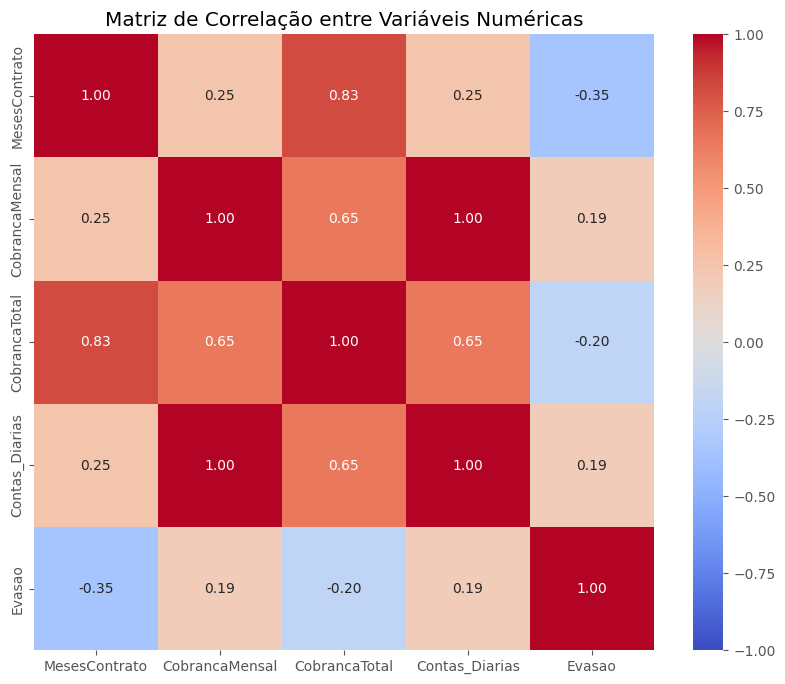


2. Correlação com Evasão:
                Correlação
MesesContrato    -0.352229
CobrancaTotal    -0.199484
CobrancaMensal    0.193356
Contas_Diarias    0.192533

3. Relações Chave:


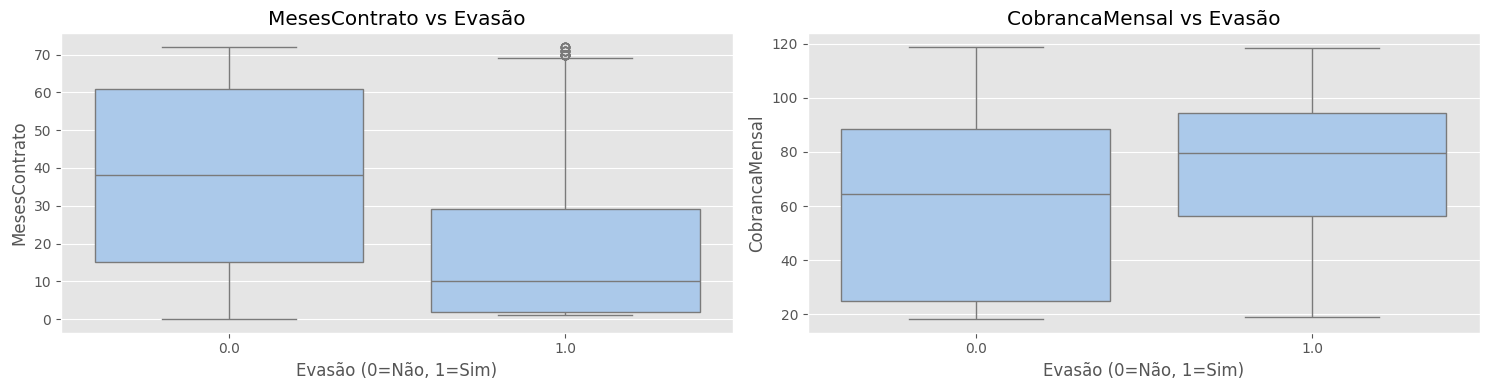


4. Análise de Interação:


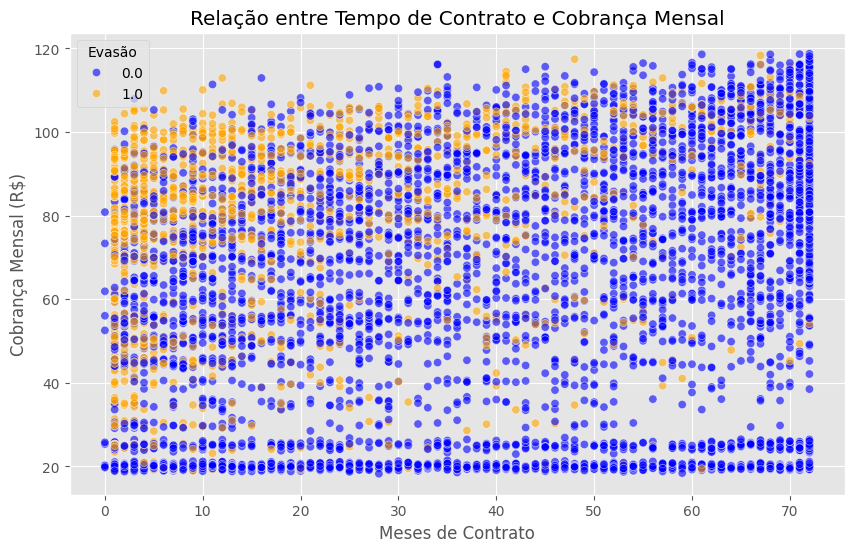


Análise concluída!


In [75]:
print("\n[ANÁLISE DE CORRELAÇÃO ENTRE VARIÁVEIS]")
print("="*50)

## 1. Verificar e preparar colunas
# Verificar se a coluna de evasão existe
if 'Evasao' not in df.columns and 'Churn' in df.columns:
    df.rename(columns={'Churn': 'Evasao'}, inplace=True)

# Criar variável TotalServices se não existir
if 'TotalServices' not in df.columns:
    servicos = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
               'TechSupport', 'StreamingTV', 'StreamingMovies']
    servicos = [s for s in servicos if s in df.columns]
    if servicos:
        df['TotalServices'] = df[servicos].apply(lambda x: (x == 'Yes').sum(axis=1))
    else:
        print("\nAviso: Não foi possível criar 'TotalServices' - colunas de serviços não encontradas")

## 2. Selecionar variáveis para análise
variaveis_correlacao = ['MesesContrato', 'CobrancaMensal', 'CobrancaTotal', 'Contas_Diarias']
if 'TotalServices' in df.columns:
    variaveis_correlacao.append('TotalServices')
if 'Evasao' in df.columns:
    variaveis_correlacao.append('Evasao')

# Filtrar colunas existentes
variaveis_correlacao = [v for v in variaveis_correlacao if v in df.columns]

## 3. Matriz de Correlação
if len(variaveis_correlacao) > 1:
    print("\n1. Matriz de Correlação (Pearson):")
    correlacao = df[variaveis_correlacao].corr()
    print(correlacao.round(2))

    plt.figure(figsize=(10, 8))
    sns.heatmap(correlacao, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1, fmt='.2f')
    plt.title('Matriz de Correlação entre Variáveis Numéricas')
    plt.show()

    ## 4. Correlações com Evasão
    if 'Evasao' in variaveis_correlacao:
        print("\n2. Correlação com Evasão:")
        correlacao_evasao = correlacao['Evasao'].sort_values(key=abs, ascending=False)
        # Remover a correlação da variável com ela mesma
        correlacao_evasao = correlacao_evasao[correlacao_evasao.index != 'Evasao']
        print(correlacao_evasao[abs(correlacao_evasao) > 0.1].to_frame('Correlação'))

## 5. Visualização das Relações Principais
if 'Evasao' in df.columns:
    print("\n3. Relações Chave:")
    plt.figure(figsize=(15, 4))

    # Lista de variáveis para plotar
    variaveis_plot = []
    if 'MesesContrato' in df.columns:
        variaveis_plot.append('MesesContrato')
    if 'CobrancaMensal' in df.columns:
        variaveis_plot.append('CobrancaMensal')
    if 'TotalServices' in df.columns:
        variaveis_plot.append('TotalServices')

    # Criar subplots dinamicamente
    for i, var in enumerate(variaveis_plot, 1):
        plt.subplot(1, len(variaveis_plot), i)
        sns.boxplot(x='Evasao', y=var, data=df)
        plt.title(f'{var} vs Evasão')
        plt.xlabel('Evasão (0=Não, 1=Sim)')
        plt.ylabel(var)

    plt.tight_layout()
    plt.show()

    ## 6. Análise de Interações
    if all(col in df.columns for col in ['CobrancaMensal', 'MesesContrato']):
        print("\n4. Análise de Interação:")
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x='MesesContrato', y='CobrancaMensal', hue='Evasao',
                        data=df, alpha=0.6, palette=['blue', 'orange'])
        plt.title('Relação entre Tempo de Contrato e Cobrança Mensal')
        plt.xlabel('Meses de Contrato')
        plt.ylabel('Cobrança Mensal (R$)')
        plt.legend(title='Evasão')
        plt.show()

print("\nAnálise concluída!")